<a href="https://colab.research.google.com/github/thecodeeagle/Genetic-Algorithm-Based-Ensemble-for-Driver-Distraction-Recognition/blob/main/VanillaCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
from keras import models
model = tf.keras.Sequential()
model.add(keras.layers.Conv2D(60, (3,3), activation = "relu", padding = 'same', input_shape = (224,224,3)))
#model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(90, (3,3), activation = "relu", padding = 'same'))
#model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(200, (3,3), activation = "relu", padding = 'same'))
#model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(512, activation= "relu"))
model.add(layers.Dense(128, activation= "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation= "softmax"))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 60)      1680      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 60)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 90)      48690     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 90)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 200)       162200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 200)       0         
_________________________________________________________________
flatten (Flatten)            (None, 156800)            0

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

import keras

In [ ]:
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
       
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

In [ ]:
import numpy as np
loaded = np.load('drive/My Drive/newdriver.npz')
train_images = loaded['train_images']
train_labels = loaded['train_labels']

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)

In [ ]:
model.compile(optimizer= keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

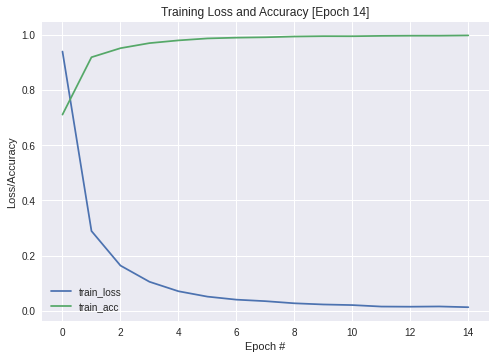

In [ ]:
history = model.fit(train_images, train_labels, epochs = 15, batch_size=64, callbacks=[plot_losses])

In [ ]:
test_images = loaded['test_images']
test_labels = loaded['test_labels']

In [ ]:
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
model.evaluate(test_images, test_labels)

144/144 [==============================] - 3s 23ms/step - loss: 0.1896 - acc: 0.9535


[0.1895996332168579, 0.9534580111503601]